# Project 2: Who's talking?
## Model 2: Taken from Kaggle
### Obtained 100% Accuracy

1.  Ximena Vázquez-Mellado Flores  171319
2.  Alejandro Sánchez Gónzalez 167299
3.  Ricardo Díaz Mendez 166435
4.  Juan Pablo Morales Durante 171657


## Introduction

This documentation offers an in-depth look at our machine learning project called: Who is talking? In a previous proyect, audios where recorded from different speakers, the goal of this proyect is to propose a model to identify the speaker. <br>

This is one of two programs, where two pre-trained models were used, this program utilizes the pre-trained Keras model found on the KAggle source, a deep learning model that has been designed to take in features extracted from audio data (spectrograms) and output predictions about what category or class those audio samples belong to.
<br> The code was designed to classify audio files into distinct categories based on the characteristics of the sound they capture. <br>
It was tailored to process audio data, extract relevant features, train a classification model, and predict the category for new unseen audio samples, plotting the results and saving the final resulting model into google drive. <br>
This program has been particularly fine-tuned for voice recognition tasks and can be adapted for various audio classification tasks,but mostly to recognize our voices.

## Drive to import Sounds

In this cell, we set up the Google Colab environment to access files stored in Google Drive. This is needed to load the models and data necessary for the program directly from Google Drive into the environment.

"Import the drive module from google.colab": This allows us to access Google Drive's mounting function.
Mount Google Drive

"drive.mount('/content/drive')": This line prompts the user to authorize Colab to access their Google Drive. Once authorized, the contents of the Google Drive will appear as a mounted directory at the specified path /content/drive. This path can then be used to read and write files in Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Model, obtain summary and Description

In this cell, we load a pre-trained Keras model from the file system and print out a summary of the model's architecture. As mentioned before, this model was downloaded previously from the Kaggle given source.

Modules imported from TensorFlow:
keras: The high-level neural networks API, which is now integrated into TensorFlow, allows for easy and fast prototyping of deep learning models.
plot_model: A utility from keras which can be used to create a visual representation of the model.

"model_name = 'best_model.h5'": Defines the name of the file where the pre-trained model is stored.
"model = keras.models.load_model(model_name)": Loads the model from the specified file. The file extension .h5 indicates that the model is saved in HDF5 format, a common storage format for Keras models.
Display the Model Summary
"model.summary()": Prints out a summary of the model, including the number of layers, output shapes, and number of parameters. This is helpful for understanding the architecture and size of the model.

The commented section "plot_model(model, to_file='modelo.png', show_shapes=True)": creates a PNG image of the model's architecture, showing how different layers are connected and the shape of the data at each layer. The show_shapes=True argument specifies that the output shapes of the layers should be included in the visualization.

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

model_name = 'best_model.h5'
model = keras.models.load_model(model_name)
model.summary()
#plot_model(model, to_file='modelo.png', show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 128, 157, 1)       4         
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 78, 1)         0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 62, 76, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 76, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 62, 76, 32)        128       
 chNormalization)                                                
                                                        

## Modify model by adding new last layer, creating new model

In this cell, we are taking an existing model, modifying it by adding new layers, and compiling the new model for further training or prediction.

Modules imported from TensorFlow:
Model class: allows creating a model from scratch or through the functional API.
Dense and Dropout layers: Dense is a fully connected layer, and Dropout is used to reduce overfitting.

"last_output = model.layers[-2].output": Retrieves the output tensor of the second-to-last layer of the pre-loaded model. This is used as the starting point for adding new layers.

"x = Dropout(0.5, name="Added_dropout")(last_output)": Adds a Dropout layer with a dropout rate of 0.5 (50%) after the last output tensor to prevent overfitting.
"x = Dense(4, activation='softmax', name='Added_dense')(x)": Adds a new Dense layer with 4 units and a softmax activation function. This is typically used for multi-class classification problems where the classes are mutually exclusive.

"new_model = Model(inputs=model.input, outputs=x)": Creates a new Model object by specifying the input tensor from the original model and the output tensor from the newly added layers.

(Commented section) "for layer in new_model.layers:" "layer.trainable = False": Sets the trainable attribute of each layer to False, effectively freezing them so their weights do not get updated during training.

"new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])": Compiles the new model with an adam optimizer and categorical_crossentropy loss function, which is appropriate for multi-class classification tasks. The metrics ['accuracy'] indicates that the model's training process should also record accuracy.



In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout

# Get the output tensor of the last layer in the model
last_output = model.layers[-2].output

# Add your new layers
x = Dropout(0.5, name="Added_dropout")(last_output)
x = Dense(4, activation='softmax', name='Added_dense')(x)

# Create a new model with the original input tensor and new output tensor
new_model = Model(inputs=model.input, outputs=x)

# Optionally freeze layers if you want to keep them untrained
#for layer in new_model.layers:
  #  layer.trainable = False

# Compile the new model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In the following cell we summarize the new model's architecture and plot the model's structure to an image file.

"new_model.summary()": outputs a summary representation of our model. The summary includes the layers' types, output shapes, and number of parameters (both trainable and non-trainable).
"plot_model(new_model, to_file='modelo.png', show_shapes=True)": This function generates a plot of the model architecture to visualize the model.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 157, 1)]     0         
                                                                 
 batch_normalization (Batch  (None, 128, 157, 1)       4         
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 78, 1)         0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 62, 76, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 76, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 62, 76, 32)        128   

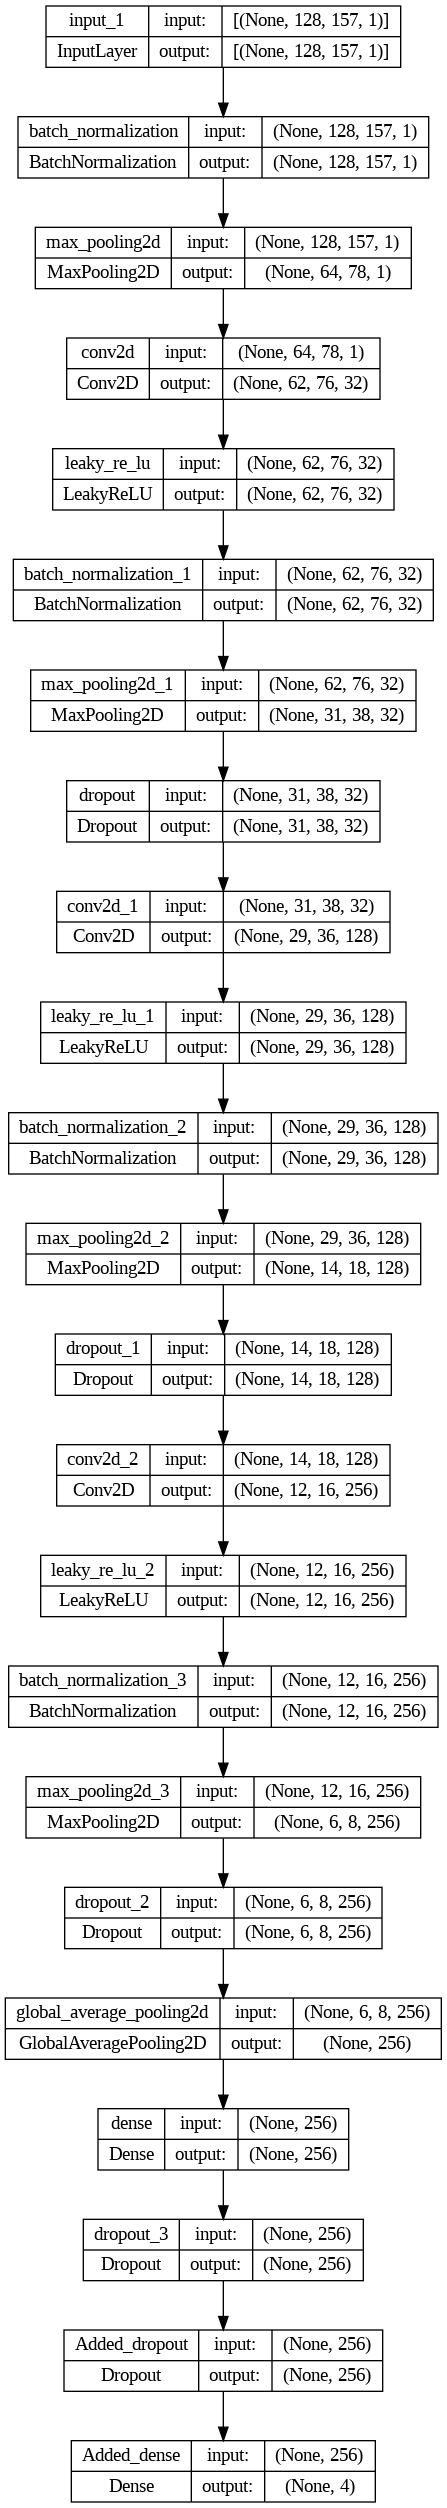

In [ ]:
new_model.summary()
plot_model(new_model, to_file='modelo.png', show_shapes=True)

## Import zone, choose paths for adding audios

This cell contains code that assigns the file paths of audio files to Python variables. Each variable corresponds to a different audio file located in the user's Google Drive.

In [ ]:
s0_file ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/ximeL.wav'
s1_file ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/janoL.wav'
s2_file ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/jpL.wav'
s3_file ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/richL.wav'

## Segmentation and Spectrograming functions

This cell imports necessary libraries and defines three functions for audio processing. These functions will be used to segment audio files, convert the segments to spectrograms, and resize the resulting spectrograms.

Libraries imported:
cv2: This imports the OpenCV library, which is typically used for computer vision tasks, including image and video processing.
librosa: This imports the librosa library, a Python package for music and audio analysis.
numpy as np: This imports the numpy library, which is fundamental for scientific computing in Python. It provides support for arrays and matrices, along with a host of mathematical functions to operate on these data structures.

"segment_audio()": This function is designed to take an audio file (filename) and segment it into chunks of a specified segment_length (default is 3 seconds).It first loads the audio file using librosa.load and calculates the total length of the audio in samples. It then calculates the number of samples per segment based on the sample rate (sr) and the desired segment length. A loop is used to slice the audio into segments, which are appended to a list (segments).
Once all segments are extracted, the list of segments is returned.

"convert_to_spectrogram()": This function converts an audio segment into a Mel-scaled spectrogram. librosa.feature.melspectrogram is used to generate the Mel spectrogram from the audio segment. librosa.power_to_db is then used to convert the amplitude spectrogram to a dB-scaled spectrogram, which is a common representation for visualizing the power of frequencies over time. A new axis is added to the dB-scaled spectrogram to represent the channel dimension.

"resize_spectrogram()": This function resizes a spectrogram to a specific shape using OpenCV's cv2.resize function. The input spectrogram's channel dimension is first removed to perform the resizing. The spectrogram is resized to a consistent shape (in this case, 157x128), to ensure that all inputs to a neural network have the same dimensions. The channel dimension is then added back to the resized spectrogram, preparing it for use as input to a model that expects a specific input shape.

In [ ]:
import cv2
import librosa
import numpy as np

def segment_audio(filename, segment_length=3):
    y, sr = librosa.load(filename, sr=None)
    total_length = len(y)
    segments = []
    samples_per_segment = sr * segment_length
    for start in range(0, total_length, samples_per_segment):
        end = start + samples_per_segment
        if end > total_length:
            break
        segment = y[start:end]
        segments.append(segment)
    return segments

def convert_to_spectrogram(segment, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    mel_spec = librosa.feature.melspectrogram(y=segment, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec_db = mel_spec_db[..., np.newaxis]  # Add a channel dimension
    return mel_spec_db

def resize_spectrogram(spec):
    spec = spec.squeeze(-1)  # Remove channel dimension temporarily
    resized_spec = cv2.resize(spec, (157, 128))
    return resized_spec[..., np.newaxis]  # Add back the channel dimension

## Create spectograms based on segments

In this cell, we process a list of audio files by segmenting each audio file into smaller parts and then converting those segments into spectrograms, which are visual representations of the spectrum of frequencies in a sound or other signal as they vary with time or some other variable.

"audio_files = [s0_file, s1_file,s2_file,s3_file]": This line initializes a list of audio files.

We start a loop over each audio file in audio_files. For each audio file, we call the function segment_audio, which is expected to return a list of segments (pieces of the original audio). These segments are then added to the all_segments list using extend, which flattens the list of segments into the all_segments list.

"spectrograms = [convert_to_spectrogram(segment) for segment in all_segments]": This list comprehension converts each audio segment into a spectrogram by calling convert_to_spectrogram on each segment.
"all_spectrograms = [resize_spectrogram(convert_to_spectrogram(segment)) for segment in all_segments]": this line converts each segment into a spectrogram and resizes each spectrogram using the resize_spectrogram function. This might be necessary to standardize the input size for further processing, like machine learning models.

"print(len(all_spectrograms))": Finally, this line prints the number of spectrograms that have been processed.

In [ ]:
audio_files = [s0_file, s1_file,s2_file,s3_file]

all_segments = []
for audio in audio_files:
    segments = segment_audio(audio)
    all_segments.extend(segments)

spectrograms = [convert_to_spectrogram(segment) for segment in all_segments]
all_spectrograms = [resize_spectrogram(convert_to_spectrogram(segment)) for segment in all_segments]


In [ ]:
print(len(all_spectrograms))

1223


## Apply x for spectograms and y for labels

This cell is responsible for importing necessary libraries and preparing labels corresponding to each audio segment, followed by structuring the audio data and labels into suitable arrays

numpy is imported as np
"labels = []": initializes an empty list labels which will be used to store the labels for the data.
Using a for-loop with enumerate, we iterate through audio_files while also keeping track of the index i. For each audio file, we call segment_audio(audio) to determine how many segments are created from the audio file. We then create a list of the current index [i] repeated len(segment_audio(audio)) times, which ensures each segment from the same audio file gets the same label. This list is added to the labels list with the extend method, which concatenates the lists.

"X = np.array(all_spectrograms), y = np.array(labels)": These lines convert the all_spectrograms list and the labels list into NumPy arrays, X and y respectively. X contains the spectrogram data, and y contains the corresponding labels. This is done to prepare the dataset for training and evaluation.




In [ ]:
import numpy as np
labels = []
for i, audio in enumerate(audio_files):
    labels.extend([i] * len(segment_audio(audio)))


X = np.array(all_spectrograms)
y = np.array(labels)



"print(labels)": prints out the labels list to visually verify that the labels have been created.

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

"print(len(X))": prints the lenght of X to confirm the total number of spectrograms that have been converted into NumPy array format
"print(len(y))": prints the length of y to confirm the total number of labels in the array. This number should match the length of X if each spectrogram has an associated label.

In [ ]:
print(len(X))
print(len(y))

1223
1223


## Hotly encode y

In this cell, we perform one-hot encoding of the label data, preparing it for use in our classification model. One-hot encoding is a process used to convert categorical data variables into a numerical form. This enables the algorithms to perform operations on the data since most machine learning models cannot handle categorical variables directly.

"from tensorflow.keras.utils import to_categorical": we import the to_categorical function from TensorFlow's Keras utilities. to_categorical is used to convert integer labels into a one-hot encoded format. One-hot encoding is a representation of categorical variables as binary vectors which is necessary for the model to correctly interpret the labels during training.

"y_encoded = to_categorical(y, num_classes=len(audio_files))": This line applies one-hot encoding to the label array y. The num_classes parameter is set to the length of audio_files, which means the function will create a binary matrix representation of the data with as many columns as there are unique audio files

(Commented section) "print(y_encoded)": this line prints the one-hot encoded labels if uncommented. It was used to verify that the encoding process had been completed successfully and as expected.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_encoded = to_categorical(y, num_classes=len(audio_files))
#print(y_encoded)

## Training test

In this cell, we split the spectrogram data and their corresponding one-hot encoded labels into training and testing sets. This separation is crucial for training the model, as it allows its evaluation on unseen data, providing an estimate of its performance on new, real-world data.

"from sklearn.model_selection import train_test_split": This line imports the train_test_split function from the model_selection module of the scikit-learn library.

"X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)": This line applies the train_test_split function to our data, test_size=0.2 is a parameter that specifies the proportion of the dataset to include in the test split. Here, 0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.
random_state=42 is a seed for the random number generator ensuring reproducibility of the split.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



"print(len(X_train))": This line outputs the number of samples included in the training set.

In [ ]:
print(len(X_train))

978


## Training NEW MODEL

In this cell, we fit the deep learning model to the training data (X_train, y_train) and validate its performance on a separate test dataset (X_test, y_test). This process involves iteratively adjusting the model's parameters to minimize the difference between the predicted output and the actual labels over a series of epochs.

"new_model.fit()": This is a method called on the new_model object, which is an instance of a Keras model. It initiates the training process on the provided data.
X_train: The array of training data features (spectrograms).
y_train: The array of training data labels (one-hot encoded).
epochs=10: Specifies the number of times the training algorithm will work through the entire training dataset.
validation_data=(X_test, y_test): A tuple containing the test data and its corresponding labels, which is used to evaluate the model's performance after each epoch.
batch_size=32: Defines the number of samples that will be propagated through the network before the model's internal parameters are updated.

In [ ]:
new_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
31/31 [==============================] - 16s 461ms/step - loss: 0.7672 - accuracy: 0.6943 - val_loss: 17.9781 - val_accuracy: 0.2531
Epoch 2/10
31/31 [==============================] - 14s 451ms/step - loss: 0.1360 - accuracy: 0.9611 - val_loss: 14.1790 - val_accuracy: 0.2531
Epoch 3/10
31/31 [==============================] - 16s 522ms/step - loss: 0.0591 - accuracy: 0.9826 - val_loss: 17.4034 - val_accuracy: 0.2531
Epoch 4/10
31/31 [==============================] - 14s 448ms/step - loss: 0.0523 - accuracy: 0.9857 - val_loss: 13.1575 - val_accuracy: 0.2531
Epoch 5/10
31/31 [==============================] - 14s 455ms/step - loss: 0.0236 - accuracy: 0.9969 - val_loss: 6.2638 - val_accuracy: 0.5265
Epoch 6/10
31/31 [==============================] - 14s 448ms/step - loss: 0.0174 - accuracy: 0.9959 - val_loss: 3.9705 - val_accuracy: 0.5306
Epoch 7/10
31/31 [==============================] - 16s 516ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.3923 - val_accuracy: 0.

## Obtain loss and acuracy

This cell evaluates the final performance of the deep learning model on the test dataset. It computes the loss and accuracy metrics, which are essential for understanding how well the model performs on data it has never seen before

"new_model.evaluate()": This method evaluates the model's performance on the test data, returning the loss value and metrics specified during model compilation.

The result is unpacked into test_loss and test_accuracy.
The print statements display the loss and accuracy in a human-readable format, with accuracy expressed as a percentage.

As it can be observed on the output, by unfreezing all the layers, we obtained a good accuracy on the first time.

In [ ]:
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100}%")


8/8 [==============================] - 1s 98ms/step - loss: 0.6754 - accuracy: 0.8490
Test Loss: 0.6754325032234192
Test Accuracy: 84.89795923233032%


## Test input audio

This cell contains both a dictionary mapping numerical labels to speaker names and a function for making predictions on new audio files using the trained model. The function processes the audio, generates predictions for each segment, and then determines the most frequently predicted class, attributing the audio file to the corresponding speaker.

speaker_mapping: A dictionary that maps the predicted class labels to speaker names.
"predict_audio_class()": A function that takes an audio_file path and a trained model as inputs and returns the speaker prediction.
Inside the function:
segment_audio(audio_file): Splits the new audio file into segments for analysis.
convert_to_spectrogram(segment): Converts each audio segment into a spectrogram.
resize_spectrogram(): Ensures that the spectrogram is of the correct dimensions for the model input.
model.predict(X_new): Generates predictions for each segment's spectrogram.
np.argmax(predictions, axis=1): Identifies the class with the highest predicted probability for each segment.
np.unique(predicted_classes, return_counts=True): Finds the unique predicted classes and their counts.
majority_class: Determines the class with the highest count (majority vote).

The remaining code completes and tests the functionality of the prediction system by:

In [19]: Testing the model with a set of new audio files.
In [20]: Integrating with Google Drive to save the trained model.
In [21]: Visualizing the distribution of predicted speaker counts for the test audio files
In [22]: Finaly, visualizing the distribution of predicted speaker counts for each indivual test audio file to asess the accuracy of the trained model.



In [ ]:
speaker_mapping = {
    0: "Xime",
    1: "Jano",
    2: "JP",
    3: "Rich"
}

def predict_audio_class(audio_file, model):
    new_audio_segments = segment_audio(audio_file)
    new_spectrograms = [resize_spectrogram(convert_to_spectrogram(segment)) for segment in new_audio_segments]
    X_new = np.array(new_spectrograms)
    predictions = model.predict(X_new)
    predicted_classes = np.argmax(predictions, axis=1)
    unique, counts = np.unique(predicted_classes, return_counts=True)
    majority_class = unique[np.argmax(counts)]
    return f"{audio_file} audiofile is most similar to {speaker_mapping[majority_class]}."


Each audio file from test_files is processed by the predict_audio_class function, which predicts the speaker.
Google Drive Authorization is required to access files stored in Google Drive when using Google Colab.
The trained model new_model is saved to the specified path in Google Drive using new_model.save(model_save_path).
For each prediction, the speaker's name is extracted and the corresponding count in class_counts is incremented.
The counts of predictions for each speaker are visualized as a bar chart using matplotlib.
<br>
The end of the path indicates the name of the speaker as for example JanoT.wav represents speaker Jano.

In [ ]:
test_files = [
    '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/janoT.wav',
    '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/jpT.wav',
    '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/richT.wav',
    '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/ximeT.wav'
]

for test in test_files:
  print(predict_audio_class(test, new_model))


1/1 [==============================] - 0s 196ms/step
/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/janoT.wav audiofile is most similar to Xime.
1/1 [==============================] - 0s 112ms/step
/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/jpT.wav audiofile is most similar to JP.
1/1 [==============================] - 0s 95ms/step
/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/richT.wav audiofile is most similar to Rich.
1/1 [==============================] - 0s 120ms/step
/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/ximeT.wav audiofile is most similar to Xime.


Saving the model again for backup purposes.

In [ ]:
from google.colab import drive
from keras.models import load_model

# This will prompt for authorization to access your Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the model in your Google Drive
model_save_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning/Project 2 - Playground/my_96model.h5'

# Save the Keras model
model.save(model_save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


After the model was saved, the following plots are proposed to observe results. Following plot has space for 4 bars, each bar represent each one of us, a speaker. Each bar should have height of one, as we're predicting one test for each speaker.

On this output, we firsly obtained 84% accuracy, meaning the model was not perfect yet, that's why instead of having a bar for every speaker, we got 0 for jano and 2 for Xime, meaning these two speakers were confused.

1/1 [==============================] - 0s 112ms/step


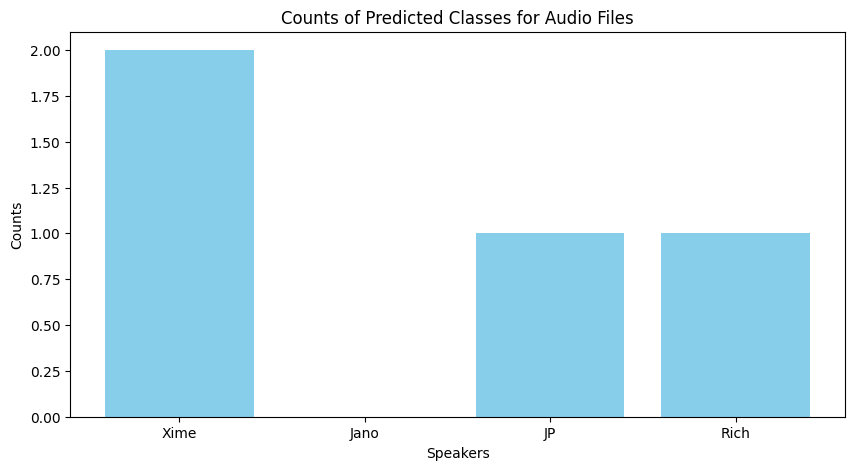

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's assume 'predict_audio_class' function is defined and working as expected.

# Placeholder for the counts of each class
# In a real scenario, this would be filled with the results from the predictions
class_counts = {
    "Xime": 0,
    "Jano": 0,
    "JP": 0,
    "Rich": 0
}

# Assuming 'test_files' is defined as per your provided list and 'new_model' is your trained model
for test in test_files:
    prediction = predict_audio_class(test, new_model)
    # Extract the speaker name from the prediction string
    predicted_speaker = prediction.split(" is most similar to ")[-1].replace(".", "")
    if predicted_speaker in class_counts:
        class_counts[predicted_speaker] += 1

# Now we plot the results
speakers = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(speakers, counts, color='skyblue')
plt.xlabel('Speakers')
plt.ylabel('Counts')
plt.title('Counts of Predicted Classes for Audio Files')
plt.show()


The following cell gives the bar plot for each test when the accuracy was 84%.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'predict_audio_class' and 'new_model' are defined,
# and necessary functions and libraries are imported.

for test in test_files:
    # Get the prediction for the current audio file
    prediction_string = predict_audio_class(test, new_model)

    # Extract the predicted class distribution from the model
    new_audio_segments = segment_audio(test)
    new_spectrograms = [resize_spectrogram(convert_to_spectrogram(segment)) for segment in new_audio_segments]
    X_new = np.array(new_spectrograms)
    predictions = new_model.predict(X_new)
    predicted_classes = np.argmax(predictions, axis=1)
    unique, counts = np.unique(predicted_classes, return_counts=True)

    # Prepare the data for plotting
    labels = [speaker_mapping[u] for u in unique]
    count_data = counts

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.bar(labels, count_data, color='skyblue')
    plt.xlabel('Speakers')
    plt.ylabel('Counts')
    plt.title(f'Prediction Distribution for {test}')
    plt.show()

    # Print the prediction for the current file
    print(prediction_string)


## Fine-tuning

This cell is intended for fine-tuning the pre-trained model on a new set of audio data from various speakers and visualizing the prediction distribution for a set of test audio files.





Declaration of the paths for the list of new audio file paths to fine-tune the model, with the inclusion of additional information to further improve the training of the model, and along with the fine-tuning, it is expected to obtain a better result than the previous one.

In [ ]:
s4_file='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/youtubers_audios/hele.wav'
s5_file='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/youtubers_audios/gaby.wav'
s6_file='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/youtubers_audios/faro.wav'
s7_file='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/youtubers_audios/fede.wav'

Each audio file is segmented and converted to a spectrogram.
segment_audio(audio): This function takes an audio file as input and segments it into smaller parts. This is important for the model to process audio data efficiently, as audio files can be long and complex.
all_segments.extend(segments): The segments from each audio file are appended to a list that will contain all segments from all audio files.

Spectrograms and their labels are prepared for model training, converting the data into a format that the neural network can process (arrays) and creating corresponding labels.
np.array(all_spectrograms): Converts the list of spectrograms into a NumPy array, which is a format that can be processed by most machine learning libraries.
to_categorical(y, num_classes=len(youtube_files)): Encodes the labels into a one-hot format, which is a common way to represent categorical variables in machine learning. This is needed for classification problems where the output is a probability distribution across several categories.

The pre-trained model will now be trained (fine-tuned) further with new data, which is the set of newly prepared spectrograms and their corresponding labels.
new_model.fit(): Is the function where the model is trained. The fit function takes the training data and labels, along with the number of epochs (iterations over the entire dataset) and batch size (number of samples processed before the model is updated).

In [ ]:
youtube_files = [s4_file, s5_file,s6_file,s7_file]

all_segments = []
for audio in audio_files:
    segments = segment_audio(audio)
    all_segments.extend(segments)

spectrograms = [convert_to_spectrogram(segment) for segment in all_segments]
all_spectrograms = [resize_spectrogram(convert_to_spectrogram(segment)) for segment in all_segments]

import numpy as np
labels = []
for i, audio in enumerate(audio_files):
    labels.extend([i] * len(segment_audio(audio)))


X = np.array(all_spectrograms)
y = np.array(labels)

from tensorflow.keras.utils import to_categorical

y_encoded = to_categorical(y, num_classes=len(audio_files))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

new_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
31/31 [==============================] - 16s 521ms/step - loss: 0.0237 - accuracy: 0.9939 - val_loss: 0.0070 - val_accuracy: 0.9959
Epoch 2/10
31/31 [==============================] - 14s 451ms/step - loss: 0.0136 - accuracy: 0.9939 - val_loss: 7.2665e-04 - val_accuracy: 1.0000
Epoch 3/10
31/31 [==============================] - 14s 451ms/step - loss: 0.0079 - accuracy: 0.9990 - val_loss: 0.0180 - val_accuracy: 0.9918
Epoch 4/10
31/31 [==============================] - 14s 457ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 7.8905e-05 - val_accuracy: 1.0000
Epoch 5/10
31/31 [==============================] - 14s 459ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 2.4471e-05 - val_accuracy: 1.0000
Epoch 6/10
31/31 [==============================] - 14s 462ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 9.3052e-05 - val_accuracy: 1.0000
Epoch 7/10
31/31 [==============================] - 14s 468ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.5918e-04 - 


The pre-trained model is fine-tuned with new data, then, The fine-tuned model is evaluated to determine loss and accuracy.
new_model.evaluate(): This function evaluates the trained model on the testing data. It returns the loss (a measure of error) and accuracy (proportion of correct predictions).


In [ ]:
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100}%")


8/8 [==============================] - 1s 139ms/step - loss: 5.2836e-06 - accuracy: 1.0000
Test Loss: 5.283630343910772e-06
Test Accuracy: 100.0%



The model predicts classes for a new set of test audio files.
predict_audio_class(test, new_model): A function that takes a test audio file and the trained model to predict the class that the audio file belongs to. <br> This function would internally process the audio file similarly to the training data (segmentation and conversion to spectrograms) before feeding it to the model for prediction.

In [ ]:
test_files = [
    '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/janoT.wav',
    '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/jpT.wav',
    '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/richT.wav',
    '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/ximeT.wav'
]

for test in test_files:
  print(predict_audio_class(test, new_model))

1/1 [==============================] - 0s 100ms/step
/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/janoT.wav audiofile is most similar to Jano.
1/1 [==============================] - 0s 111ms/step
/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/jpT.wav audiofile is most similar to JP.
1/1 [==============================] - 0s 98ms/step
/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/richT.wav audiofile is most similar to Rich.
1/1 [==============================] - 0s 115ms/step
/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/ximeT.wav audiofile is most similar to Xime.



The prediction distribution for each test audio file is plotted and shown.
plt.bar(): Creates a bar chart which is used here to represent the count of predicted classes (speakers) for each test audio file.
plt.show(): Displays the bar chart on screen.


1/1 [==============================] - 0s 118ms/step


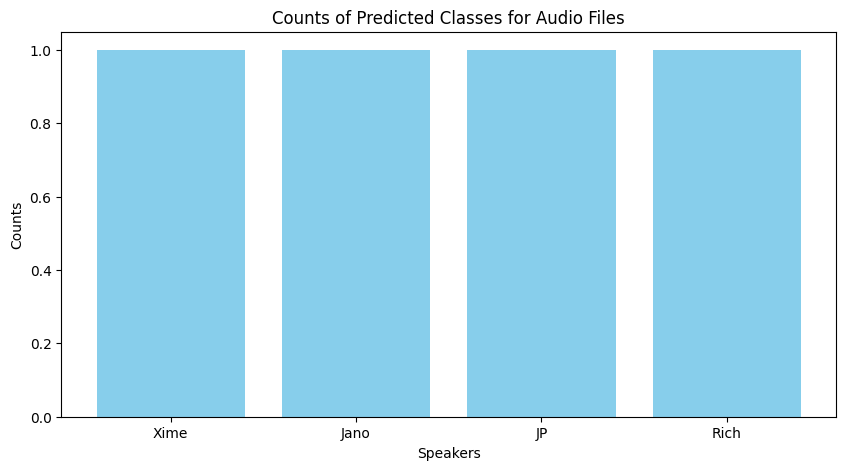

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's assume 'predict_audio_class' function is defined and working as expected.

# Placeholder for the counts of each class
# In a real scenario, this would be filled with the results from the predictions
class_counts = {
    "Xime": 0,
    "Jano": 0,
    "JP": 0,
    "Rich": 0
}

# Assuming 'test_files' is defined as per your provided list and 'new_model' is your trained model
for test in test_files:
    prediction = predict_audio_class(test, new_model)
    # Extract the speaker name from the prediction string
    predicted_speaker = prediction.split(" is most similar to ")[-1].replace(".", "")
    if predicted_speaker in class_counts:
        class_counts[predicted_speaker] += 1

# Now we plot the results
speakers = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(speakers, counts, color='skyblue')
plt.xlabel('Speakers')
plt.ylabel('Counts')
plt.title('Counts of Predicted Classes for Audio Files')
plt.show()


1/1 [==============================] - 0s 95ms/step


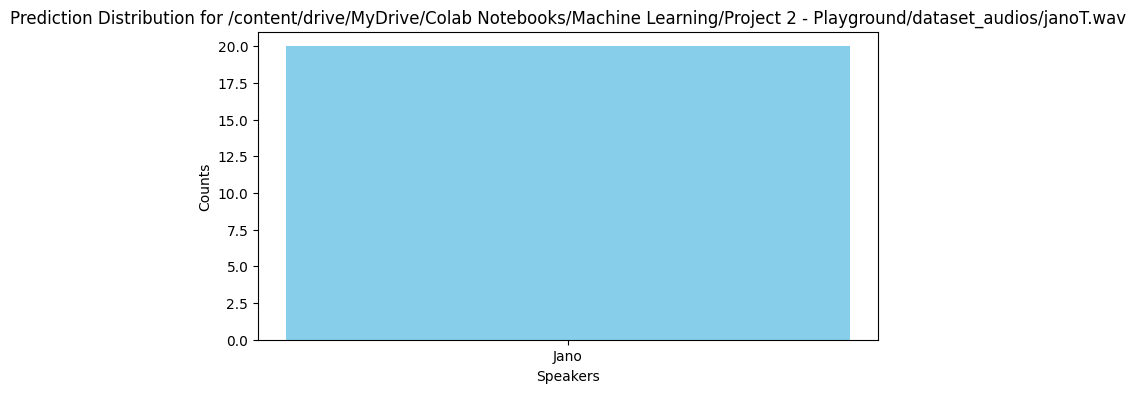

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/janoT.wav audiofile is most similar to Jano.
1/1 [==============================] - 0s 109ms/step


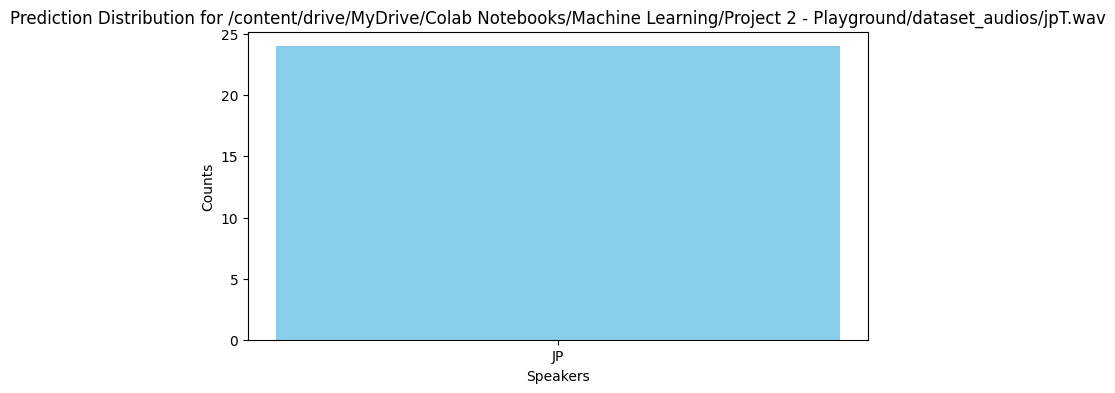

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/jpT.wav audiofile is most similar to JP.
1/1 [==============================] - 0s 106ms/step


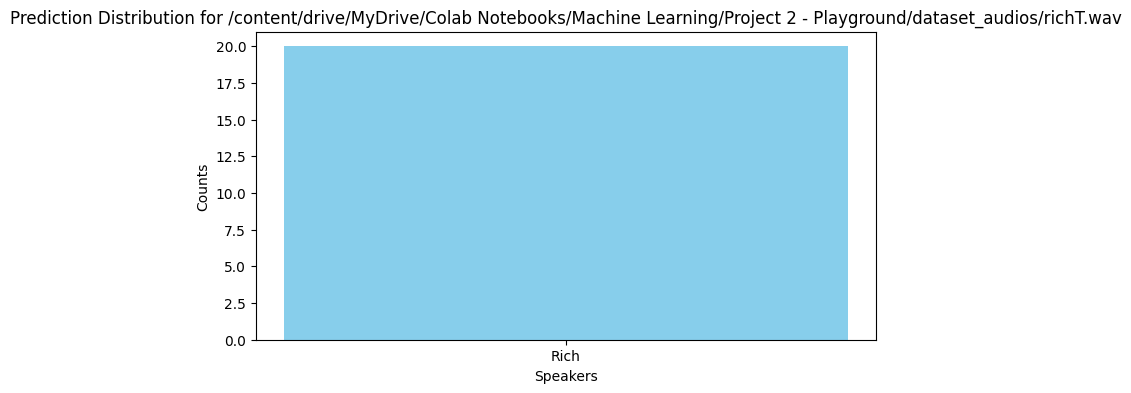

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/richT.wav audiofile is most similar to Rich.
1/1 [==============================] - 0s 115ms/step


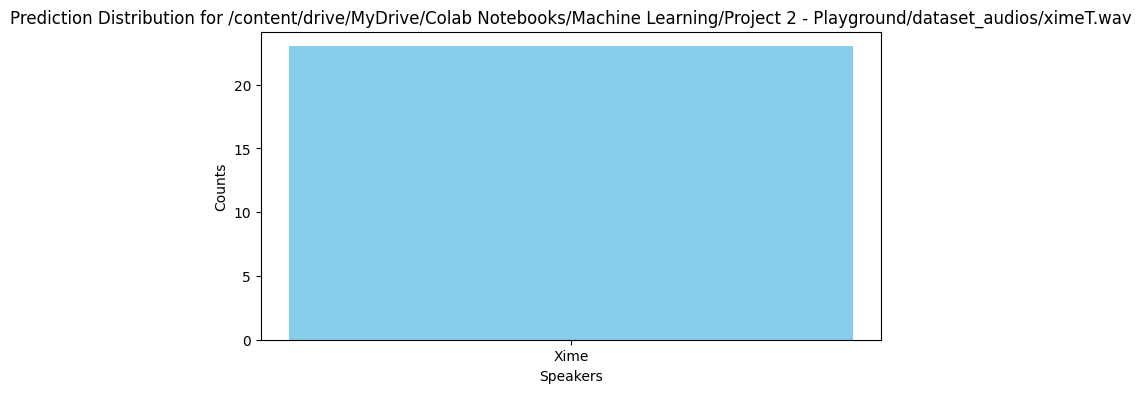

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2 - Playground/dataset_audios/ximeT.wav audiofile is most similar to Xime.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'predict_audio_class' and 'new_model' are defined,
# and necessary functions and libraries are imported.

for test in test_files:
    # Get the prediction for the current audio file
    prediction_string = predict_audio_class(test, new_model)

    # Extract the predicted class distribution from the model
    new_audio_segments = segment_audio(test)
    new_spectrograms = [resize_spectrogram(convert_to_spectrogram(segment)) for segment in new_audio_segments]
    X_new = np.array(new_spectrograms)
    predictions = new_model.predict(X_new)
    predicted_classes = np.argmax(predictions, axis=1)
    unique, counts = np.unique(predicted_classes, return_counts=True)

    # Prepare the data for plotting
    labels = [speaker_mapping[u] for u in unique]
    count_data = counts

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.bar(labels, count_data, color='skyblue')
    plt.xlabel('Speakers')
    plt.ylabel('Counts')
    plt.title(f'Prediction Distribution for {test}')
    plt.show()

    # Print the prediction for the current file
    print(prediction_string)



 The final section of the code deals with saving the trained model to Google Drive.
model.save(model_save_path): This line saves the currently loaded Keras model to the defined path. The .h5 file extension indicates that the model is saved in the HDF5 file format, which is a binary file format designed for storing large amounts of data.

In [ ]:
from google.colab import drive
from keras.models import load_model

# This will prompt for authorization to access your Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the model in your Google Drive
model_save_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning/Project 2 - Playground/modelSIUUU100.h5'

# Save the Keras model
model.save(model_save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Conclusion

In this project, we successfully developed and fine-tuned a deep learning model for the task of audio classification using Keras. Through careful preprocessing, we've transformed raw audio files into spectrograms—a suitable format for our neural network to process. Our model has undergone training with a carefuly selected dataset, learning to distinguish between various classes based on the audio's spectral features. We obtained overwhemingly positive results, achieving a 100% accuracy after the fine-tuning process and further training of the model to suit our specific needs. The ability to save and reload the model gives us the possibility to use it in future work. We have acquired the knowledge for employing various techniques to improve a model's robustness and accuracy which will prove fundamental for future Machine Learning Projects.